# Analytics

## Imports

In [2]:
import sys
import pymongo
import pandas as pd
import numpy as np
import re
import copy
from typing import Literal
from matplotlib import pyplot as plt

## Connect to the MongoDB database

In [3]:
# Access the MongoDB connection information from the settings
mongo_uri = "localhost"
mongo_port = 27017
mongo_db = "watch_scraping"

# Create a MongoDB client
client = pymongo.MongoClient(mongo_uri, mongo_port)

# Access the database
db = client[mongo_db]

# Access the collection
watches = db["watches"]

In [4]:
examples = watches.find().limit(3)
for example in examples:
    print(example)

{'_id': ObjectId('6547629977ddcb0f219c67da'), 'image_urls': ['https://chronexttime.imgix.net/V/6/V61966/V61966_1_det.png?w=1000&ar=1:1&auto=format&fm=png&q=55&usm=50&usmrad=1.5&dpr=1&trim=color&fit=fill&auto=compress&bg=FFFFFF&bg-remove=true', 'https://chronexttime.imgix.net/V/6/V61966/V61966_1.png?w=1000&ar=1:1&auto=format&fm=png&q=55&usm=50&usmrad=1.5&dpr=1&trim=color&fit=fill&auto=compress&bg=FFFFFF&bg-remove=false', 'https://chronexttime.imgix.net/V/6/V61966/V61966_2.jpg?w=1000&ar=1:1&auto=format&fm=jpg&q=55&usm=50&usmrad=1.5&dpr=1&trim=color&fit=fill&auto=compress&bg=FFFFFF&bg-remove=false', 'https://chronexttime.imgix.net/V/6/V61966/V61966_3.jpg?w=1000&ar=1:1&auto=format&fm=jpg&q=55&usm=50&usmrad=1.5&dpr=1&trim=color&fit=fill&auto=compress&bg=FFFFFF&bg-remove=false', 'https://chronexttime.imgix.net/V/6/V61966/V61966_4.jpg?w=1000&ar=1:1&auto=format&fm=jpg&q=55&usm=50&usmrad=1.5&dpr=1&trim=color&fit=fill&auto=compress&bg=FFFFFF&bg-remove=false'], 'image_paths': ['full/3f90e8c550279

In [5]:
# Count the number of documents in the collection
print(f"Number of items in the collection: {watches.count_documents({})}")

Number of items in the collection: 1482


## Descriptive statistics

In [6]:
raw_data = pd.json_normalize(list(watches.find({})))
raw_data.head(3)

,_id,image_urls,image_paths,thumb_paths,état,année,marque,modèle,référence,mouvement,dimensions,genre,sku,boîtier,bracelet,cristal,couleur du cadran,fonctions,price
0,6547629977ddcb0f219c67da,[https://chronexttime.imgix.net/V/6/V61966/V61...,[full/3f90e8c550279709a1bd0e96de95831a3642cdd4...,[thumbs/small/3f90e8c550279709a1bd0e96de95831a...,non-portée - neuve,2023,omega,seamaster diver 300m,210.32.42.20.04.001,automatique,42mm,homme,v61966,acier inoxydable,caoutchouc,saphir,blanc,"[date, valve à hélium, aiguilles lumineuses, i...",5300.0
1,6547629c77ddcb0f219c67db,[https://chronexttime.imgix.net/V/6/V67443/V67...,[full/2fb3346adeb4ed7cf90b93b8e9c9052d5deaaa5b...,[thumbs/small/2fb3346adeb4ed7cf90b93b8e9c9052d...,non-portée - neuve,2023,breitling,avenger chronograph 45 night mission,v13317101l1x2,automatique,45mm,homme,v67443,titane,cuir,saphir,vert,"[aiguilles lumineuses, indice de luminosité, l...",4550.0
2,6547629f77ddcb0f219c67dc,[https://chronexttime.imgix.net/V/6/V67506/V67...,[full/1137d34ac9f8277bf4332e62a204f6ee723023ad...,[thumbs/small/1137d34ac9f8277bf4332e62a204f6ee...,certifiée d'occasion - bien,2020,tag heuer,carrera,cbn2a10.ba0643,automatique,44mm,homme,v67506,acier inoxydable,acier inoxydable,saphir,vert,"[date, couronne vissée, petite seconde, tachym...",4870.0


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                1482 non-null   object 
 1   image_urls         1482 non-null   object 
 2   image_paths        1482 non-null   object 
 3   thumb_paths        1482 non-null   object 
 4   état               1482 non-null   object 
 5   année              1419 non-null   object 
 6   marque             1482 non-null   object 
 7   modèle             1482 non-null   object 
 8   référence          1482 non-null   object 
 9   mouvement          1439 non-null   object 
 10  dimensions         1461 non-null   object 
 11  genre              1482 non-null   object 
 12  sku                1482 non-null   object 
 13  boîtier            1469 non-null   object 
 14  bracelet           1467 non-null   object 
 15  cristal            1445 non-null   object 
 16  couleur du cadran  1459 

In [8]:
raw_data.isna().sum()

_id                    0
image_urls             0
image_paths            0
thumb_paths            0
état                   0
année                 63
marque                 0
modèle                 0
référence              0
mouvement             43
dimensions            21
genre                  0
sku                    0
boîtier               13
bracelet              15
cristal               37
couleur du cadran     23
fonctions            147
price                  0
dtype: int64

In [9]:
raw_data.describe(include='object')

,_id,image_urls,image_paths,thumb_paths,état,année,marque,modèle,référence,mouvement,dimensions,genre,sku,boîtier,bracelet,cristal,couleur du cadran,fonctions
count,1482,1482,1482,1482,1482,1419,1482,1482,1482,1439,1461,1482,1482,1469,1467,1445,1459,1335
unique,1482,1482,1482,1482,5,61,69,706,1252,3,74,4,1482,31,39,5,19,467
top,6547629977ddcb0f219c67da,[https://chronexttime.imgix.net/V/6/V61966/V61...,[full/3f90e8c550279709a1bd0e96de95831a3642cdd4...,[thumbs/small/3f90e8c550279709a1bd0e96de95831a...,non-portée - neuve,2023,rolex,datejust 41,126300,automatique,41mm,homme,v61966,acier inoxydable,acier inoxydable,saphir,noir,"[date, minute, heure, seconde au centre]"
freq,1,1,1,1,808,723,290,51,20,1172,213,929,1,928,571,1393,518,59


In [10]:
raw_data.describe()

,price
count,1482.000000
mean,11823.130904
std,18934.153677
min,800.000000
25%,2840.000000
50%,6080.000000
75%,12537.500000
max,239000.000000


In [11]:
# Summarize categorical variables
def describe_categorical(
    df,
    categorical_cols=None,
    explode_lists=True,
    limit=None,
    dropna=False,
    display: None | Literal["text", "plot"] = None,
    **plot_kwargs,
):
    if display is not None and display not in ["text", "plot"]:
        raise ValueError("`display` must be 'text' or 'plot'.")

    if categorical_cols is None:
        categorical_cols = df.select_dtypes(include="object")

    if limit is None:
        limit = -1

    def contains_list(col):
        return any(isinstance(elem, list) for elem in df[col])

    summaries = {}

    for col in categorical_cols:
        summary = None
        values = df[col]

        if explode_lists and contains_list(col):
            values = values.explode()

        summary = values.value_counts(dropna=dropna)

        if limit > 0:
            other_counts = sum(summary.iloc[limit:])
            if other_counts > 0:
                summary = summary.iloc[:limit]
                summary = pd.concat((summary, pd.Series([other_counts], index=["autre"]))).rename_axis(col)

        if display == "text":
            print(summary.to_string())
            print()
        elif display == "plot":
            summary.sort_values(ascending=True).plot.barh(title=f"Summary : `{col}`", ylabel="", **plot_kwargs)
            plt.show()
            # TODO : add / chose freq

        summaries[col] = summary

    return summaries

In [12]:
cols_to_describe = [
    "état",
    "année",
    "marque",
    "modèle",
    "mouvement",
    "dimensions",
    "genre",
    "boîtier",
    "bracelet",
    "cristal",
    "couleur du cadran",
    "fonctions",
]
_ = describe_categorical(raw_data, categorical_cols=cols_to_describe, display="text")

état
non-portée - neuve                    808
certifiée d'occasion - très bien      264
certifiée d'occasion - comme neuve    253
certifiée d'occasion - bien           139
certifiée d'occasion - vintage         18

année
2023     723
2022     103
2021      63
NaN       63
2020      36
2019      32
2017      27
2018      26
2015      23
2014      23
2008      23
2009      21
2016      20
1990      18
2000      16
2013      16
2011      14
1999      14
2012      14
2002      14
2006      13
2005      13
2010      11
1997      10
2001       9
1991       9
1998       8
2007       8
2003       7
2004       7
1994       7
1995       7
1969       6
1970       6
1989       5
1988       5
1992       5
1993       4
1971       4
1980       4
1982       4
1972       4
1981       3
1974       3
1950       3
1986       3
1985       3
1987       3
1996       3
1968       2
1975       2
1973       2
1962       1
1978       1
1963       1
1966       1
1946       1
1951       1
1984       1
20233      

In [14]:
# Pre processes


def split_strip(l):
    return [elem.strip() for elem in l.split("/")]


def format_numerical(series, min_value, max_value):
    # Format to numerical values
    trim = re.compile(r"[^\d.,]+")
    new_series = series.apply(lambda x: trim.sub("", str(x))).replace("", np.NaN).astype(float)
    # Mask outliers
    new_series = new_series.mask((new_series > max_value) | (new_series < min_value), np.NaN)
    return new_series.astype("object")


def to_intervals(series, bins, precision, ignore_value):
    # Create intervals
    intervals = pd.cut(x=series.replace(ignore_value, np.NaN).values, bins=bins, duplicates="drop", precision=precision)

    new_series = pd.Series(intervals).astype("object").fillna(ignore_value)

    # Round intervals if necessary
    if precision == 0:
        new_series = new_series.apply(
            lambda x: x if x == ignore_value else pd.Interval(int(round(x.left)), int(round(x.right)))
        )

    return new_series


def clean_list(l, to_remove):
    if not isinstance(l, list):
        return l

    l_cleaned = copy.deepcopy(l)

    for elem_to_remove in to_remove:
        if elem_to_remove in l:
            l_cleaned.remove(elem_to_remove)
            
    return l_cleaned


def preprocess(df):
    new_df = df.copy(deep=True)

    # Remove unnecessary column
    new_df.drop(columns=["image_urls"], inplace=True)

    unknown_token = "inconnu"

    # Format to numerical for column 'année'
    new_df["année"] = format_numerical(new_df["année"], min_value=1500, max_value=2023)

    # Format to numerical and create intervals for column 'dimensions'
    new_df["dimensions"] = format_numerical(new_df["dimensions"], min_value=5, max_value=70)

    # Handle NaN and empty values
    # Note : Columns image_urls, image_paths, thumb_paths and price have been formatted during scraping
    new_df[
        [
            "fonctions",
            "année",
            "dimensions",
            "état",
            "genre",
            "boîtier",
            "bracelet",
            "marque",
            "modèle",
            "cristal",
            "couleur du cadran",
            "mouvement",
            "référence",
            "sku",
        ]
    ] = (
        new_df[
            [
                "fonctions",
                "année",
                "dimensions",
                "état",
                "genre",
                "boîtier",
                "bracelet",
                "marque",
                "modèle",
                "cristal",
                "couleur du cadran",
                "mouvement",
                "référence",
                "sku",
            ]
        ]
        .fillna(unknown_token)
        .replace("", unknown_token)
    )

    # Create intervals for columns 'année' and 'dimensions'
    new_df["année_cat"] = to_intervals(new_df["année"], bins=10, precision=0, ignore_value=unknown_token)
    new_df["dimensions_cat"] = to_intervals(new_df["dimensions"], bins=10, precision=0, ignore_value=unknown_token)

    # Clean 'état' column
    new_df["état"] = new_df["état"].apply(lambda x: str(x).split("-")[-1].strip())

    # Clean 'genre' column
    new_df["genre"] = new_df["genre"].replace("unisex", "unisexe")

    # Remove unnecessary funcitons and calculate the number of functions
    new_df["fonctions"] = new_df["fonctions"].apply(lambda x: clean_list(x, ["heure", "minute"]))
    new_df["n_fonctions"] = new_df["fonctions"].apply(lambda x: len(x))

    # Format to list
    new_df["boîtier"] = new_df["boîtier"].apply(split_strip)
    new_df["bracelet"] = new_df["bracelet"].apply(split_strip)

    # Explode dataframe images
    new_df = new_df.explode(["image_paths", "thumb_paths"])

    return new_df

In [15]:
# Most important for our use case (image generation) : images diversity

In [16]:
images = preprocess(raw_data)
images.head(3)

,_id,image_paths,thumb_paths,état,année,marque,modèle,référence,mouvement,dimensions,...,sku,boîtier,bracelet,cristal,couleur du cadran,fonctions,price,année_cat,dimensions_cat,n_fonctions
0,6547629977ddcb0f219c67da,full/3f90e8c550279709a1bd0e96de95831a3642cdd4.jpg,thumbs/small/3f90e8c550279709a1bd0e96de95831a3...,neuve,2023.0,omega,seamaster diver 300m,210.32.42.20.04.001,automatique,42.0,...,v61966,[acier inoxydable],[caoutchouc],saphir,blanc,"[date, valve à hélium, aiguilles lumineuses, i...",5300.0,"(2015, 2023]","(40, 43]",10
0,6547629977ddcb0f219c67da,full/3097176b675e08d9edaf7a8f05bf5149406be337.jpg,thumbs/small/3097176b675e08d9edaf7a8f05bf51494...,neuve,2023.0,omega,seamaster diver 300m,210.32.42.20.04.001,automatique,42.0,...,v61966,[acier inoxydable],[caoutchouc],saphir,blanc,"[date, valve à hélium, aiguilles lumineuses, i...",5300.0,"(2015, 2023]","(40, 43]",10
0,6547629977ddcb0f219c67da,full/285cbc17ece2c3b24c46c887b5e96a721104b174.jpg,thumbs/small/285cbc17ece2c3b24c46c887b5e96a721...,neuve,2023.0,omega,seamaster diver 300m,210.32.42.20.04.001,automatique,42.0,...,v61966,[acier inoxydable],[caoutchouc],saphir,blanc,"[date, valve à hélium, aiguilles lumineuses, i...",5300.0,"(2015, 2023]","(40, 43]",10


In [17]:
images.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6794 entries, 0 to 1481
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                6794 non-null   object 
 1   image_paths        6794 non-null   object 
 2   thumb_paths        6794 non-null   object 
 3   état               6794 non-null   object 
 4   année              6794 non-null   object 
 5   marque             6794 non-null   object 
 6   modèle             6794 non-null   object 
 7   référence          6794 non-null   object 
 8   mouvement          6794 non-null   object 
 9   dimensions         6794 non-null   object 
 10  genre              6794 non-null   object 
 11  sku                6794 non-null   object 
 12  boîtier            6794 non-null   object 
 13  bracelet           6794 non-null   object 
 14  cristal            6794 non-null   object 
 15  couleur du cadran  6794 non-null   object 
 16  fonctions          6794 non-n

In [18]:
images.isna().sum()

_id                  0
image_paths          0
thumb_paths          0
état                 0
année                0
marque               0
modèle               0
référence            0
mouvement            0
dimensions           0
genre                0
sku                  0
boîtier              0
bracelet             0
cristal              0
couleur du cadran    0
fonctions            0
price                0
année_cat            0
dimensions_cat       0
n_fonctions          0
dtype: int64

In [19]:
images.describe(include='object')

,_id,image_paths,thumb_paths,état,année,marque,modèle,référence,mouvement,dimensions,genre,sku,boîtier,bracelet,cristal,couleur du cadran,fonctions,année_cat,dimensions_cat
count,6794,6794,6794,6794,6794.0,6794,6794,6794,6794,6794.0,6794,6794,6794,6794,6794,6794,6794,6794,6794
unique,1482,6597,6597,5,61.0,69,706,1252,4,75.0,3,1482,31,39,6,19,460,11,11
top,6547667577ddcb0f219c6926,full/d77a01d7cc56285d1534b9fb5f5a4c1288691c3e.jpg,thumbs/small/d77a01d7cc56285d1534b9fb5f5a4c128...,neuve,2023.0,rolex,datejust 41,126300,automatique,41.0,homme,v00100201,[acier inoxydable],[acier inoxydable],saphir,noir,inconnu,"(2015, 2023]","(40, 43]"
freq,12,198,198,3317,2908.0,1413,237,94,5289,1000.0,4231,12,4199,2620,6295,2425,686,4425,2253


In [20]:
images.describe()

,price,n_fonctions
count,6794.000000,6794.000000
mean,12267.834854,5.264940
std,18777.923025,2.413256
min,800.000000,0.000000
25%,3030.000000,4.000000
50%,6440.000000,6.000000
75%,13120.000000,7.000000
max,239000.000000,12.000000


In [21]:
cols_to_describe = ["état", "année_cat", "marque", "modèle", "mouvement", "dimensions_cat", "genre", "boîtier", "bracelet", "cristal", "couleur du cadran", "fonctions", "n_fonctions"]
_ = describe_categorical(images, categorical_cols=cols_to_describe, display="text", limit=20)

état
neuve          3317
comme neuve    1333
très bien      1313
bien            734
vintage          97

année_cat
(2015, 2023]    4425
(2008, 2015]     711
(2000, 2008]     447
inconnu          348
(1992, 2000]     287
(1984, 1992]     271
(1969, 1977]     129
(1977, 1984]      77
(1961, 1969]      61
(1946, 1954]      31
(1954, 1961]       7

marque
rolex               1413
omega                793
tag heuer            539
longines             421
audemars piguet      323
tudor                309
breitling            280
iwc                  237
hublot               232
cartier              200
rado                 165
chopard              153
zenith               139
patek philippe       125
jaeger-lecoultre     101
maurice lacroix       98
nomos                 92
oris                  83
u-boat                79
panerai               75
autre                937

modèle
datejust 41                                                237
datejust 36                                      

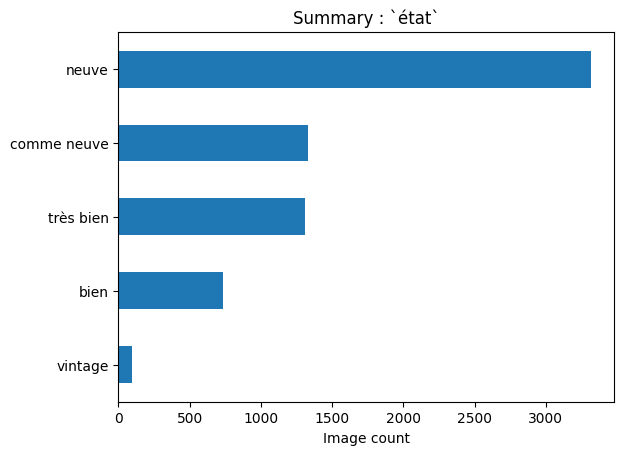

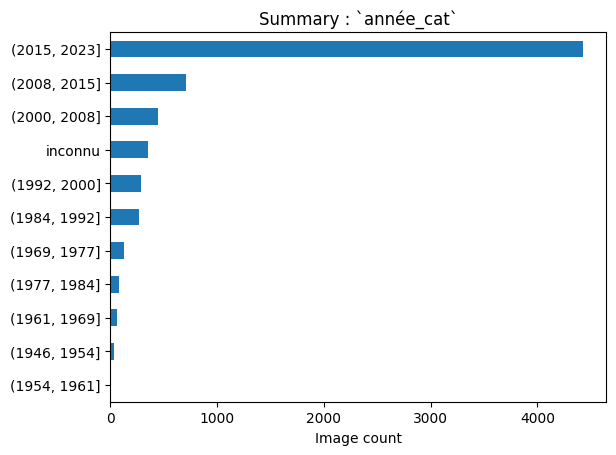

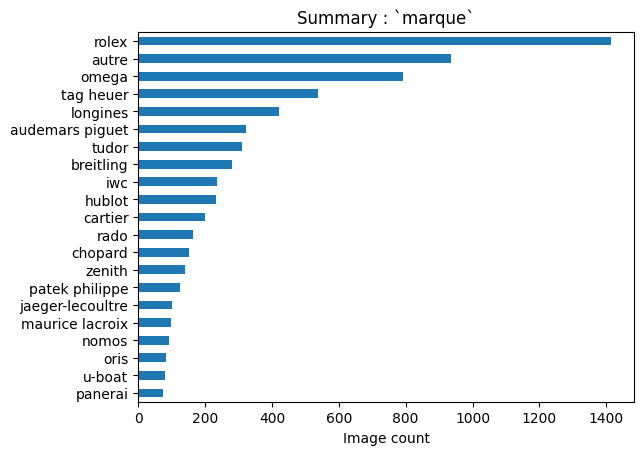

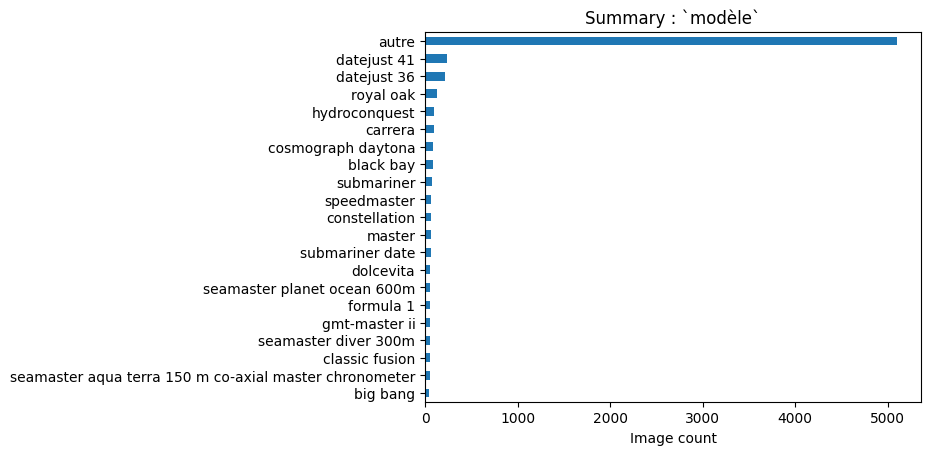

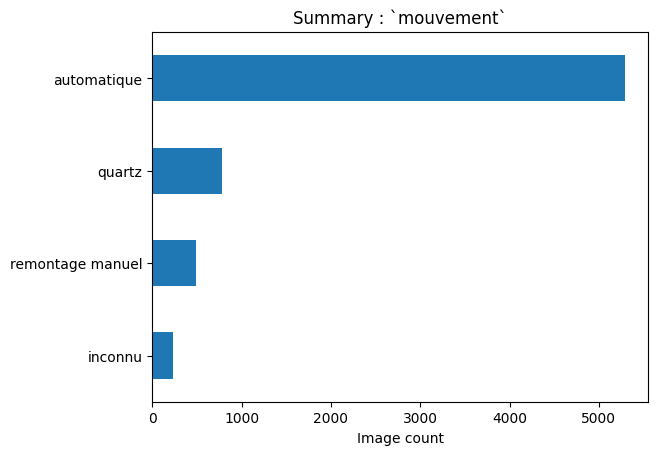

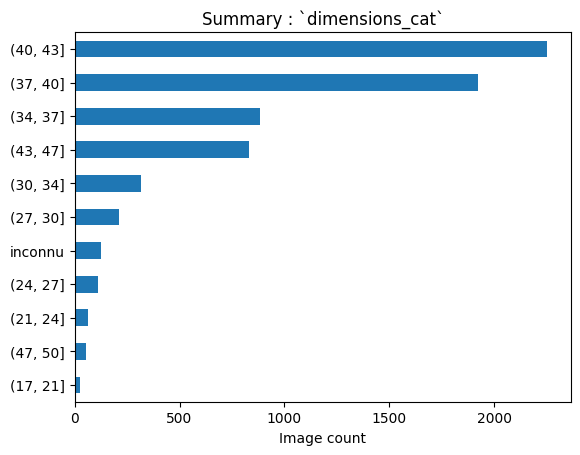

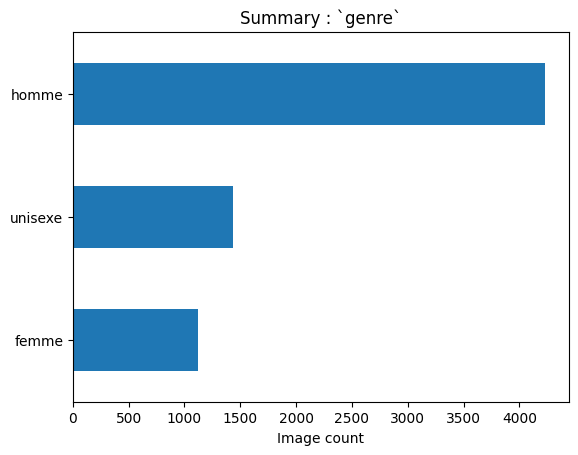

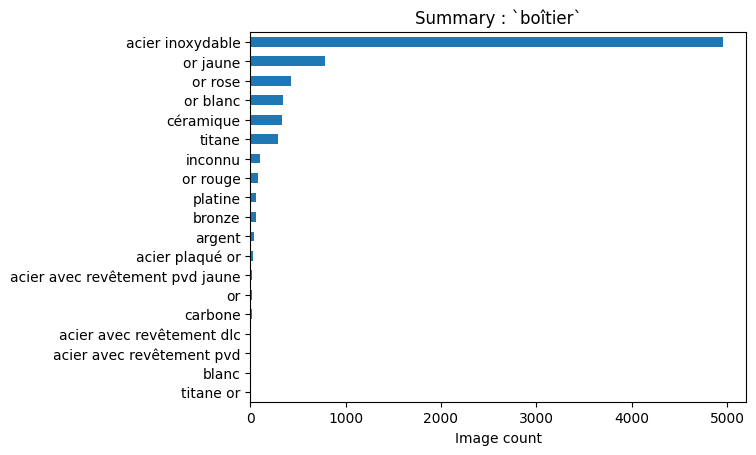

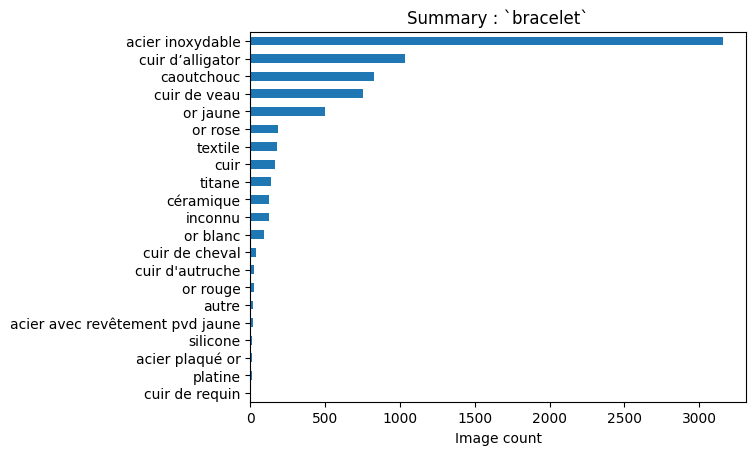

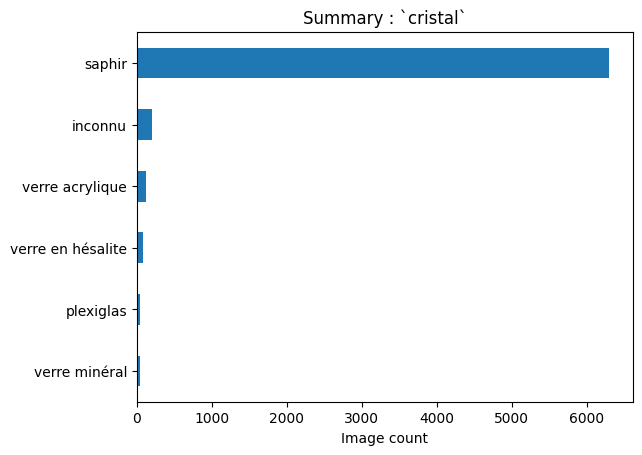

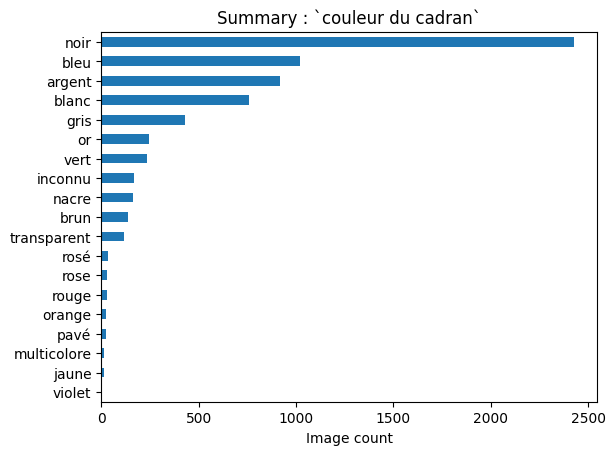

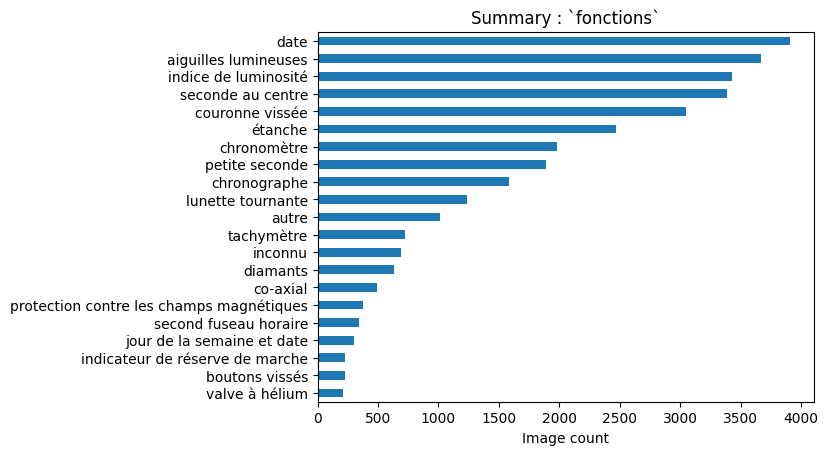

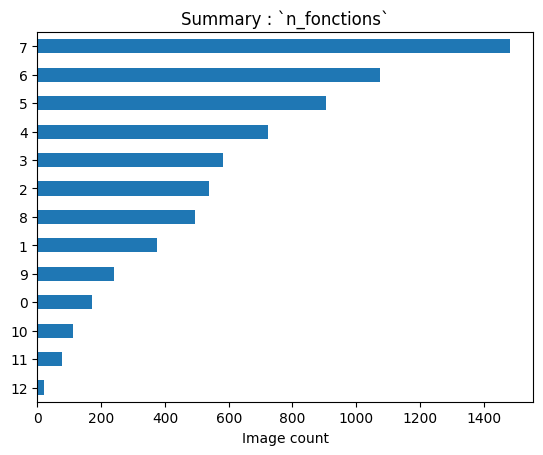

In [28]:
_ = describe_categorical(images, categorical_cols=cols_to_describe, display="plot", limit=20, xlabel="Image count")


In [23]:
# Average image count per item
count = images.groupby("_id").size().mean().astype(int)
print(f"Average image count per item: {count}")

Average image count per item: 4


In [24]:
# TODO :
# Describe per item vs per image

In [25]:
# TODO
# Tableau nombre d'items, nombre d'images, nombre d'images moyen par item

In [26]:
# TODO
# For price : stats sur les prix pas vraiment intéressantes. Objectif principal = voir diversité des montres dans le jeu construit.
# Boxplot total. Optional : Boxplot per brand (most frequent ones) 

In [27]:
# ? analyse croisée
# Diversité au sein d'une marque (peut y avoir beaucoup d'images mais le même modèle dans des couleurs différentes -> pas énormément de variation)
# Peut être inutile si on a déjà le nombre d'images par modèle
# Beaucoup de modèles donc peut être plus lisible de faire par brand ? 
# Number of distinct models per brand